En este notebook se va a realizar el trabajo de python de la asignatura de Software Matemático y Estadístico (SME).
Lo primero de todo es importar las librerias que vamos a usar.

In [38]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import statistics

Para realizar este trabajo se van a utilizar datos random con los que vamos a generar diferentes datasets y dataframes. Por esto mismo vamos a poner una seed, para que al realizar las ejecuciones den siempre los mismos resultados.

In [39]:
random.seed(33)

Vamos a empezar defininiendo las funciones que generan la información que vamos a necesitar pasar a las funciones. Para generar un dataset tenemos que indicar en número de filas y de columnas que queremos.

In [40]:
def create_dataset(num_rows, num_columns):
    random.seed(33)
    # Creamos una lista vacía que almacenará los datos del dataset
    data = []

    # Generamos los datos del dataset
    for i in range(num_rows):
        row = []
        for j in range(num_columns):
            # Generamos un número aleatorio para cada columna
            value = random.randint(0, 100)
            row.append(value)
        # Añadimos la fila al dataset
        data.append(row)

    # Devolvemos el dataset
    return data

Sin embargo, a la hora de crear el Dataframe, necesitamos pasarle a la función los parámetros i, j y n, donde i es el número más bajo que puede aparecer, j el más altó y n el número fílas que queremos generar. En todo caso, siempre se van a generar Dataframes de 2 columnas.

In [41]:
#i numero más bajo, j el más alto, n, numero de filas
def generate_df(i, j, n):
    random.seed(33)
    rows = [[random.randint(i, j), random.choice([True, False])] for _ in range(n)]
    df = pd.DataFrame(rows, columns=['value', 'label'])
    return df

Ahora que ya tenemos definidas las funciones que crean tanto datasets como dataframes, vamos a generar los dataset y dataframes que vamos a usar en las funciones.

In [42]:
df = generate_df(0, 100, 150)
dataset = create_dataset(5, 15)
random.seed(33)
array = [random.randint(1, 100) for _ in range(50)]

Ahora empezamos a crear básicas indicadas en la asignatura.

En la siguiente función, recibimos como entrada un vector de tipo numérico y un número de intervalos para implementar la discretización del propio vector que se da como entrada mediante el método equal width.

In [43]:
def discretizeEW(data, num_intervals):
    # Calcula el rango de valores
    data_min = np.min(data)
    data_max = np.max(data)
    inter = int((data_max - data_min) / num_intervals)
    x_discretized = []
    
    # Inicializa los límites de los intervalos
    cut_points = [data_min + i * inter for i in range(num_intervals + 1)]

    # Discretiza los datos asignando cada valor a su intervalo correspondiente
    for i in range(0, num_intervals):
        aux = []
        for j in data:
            if j >= cut_points[i] and j <= cut_points[i + 1]:
                aux += [j]
        x_discretized += [aux]

    return (x_discretized, cut_points)

print(array)
discretizeEW(array, 3)

[74, 22, 81, 30, 36, 62, 84, 69, 68, 24, 84, 79, 65, 42, 88, 68, 62, 57, 37, 87, 82, 10, 39, 53, 40, 67, 64, 7, 96, 78, 95, 87, 55, 36, 41, 72, 98, 88, 32, 16, 8, 41, 37, 28, 9, 96, 47, 16, 84, 42]


([[22, 30, 36, 24, 37, 10, 7, 36, 32, 16, 8, 37, 28, 9, 16],
  [62, 65, 42, 62, 57, 37, 39, 53, 40, 67, 64, 55, 41, 41, 37, 47, 42],
  [74,
   81,
   84,
   69,
   68,
   84,
   79,
   88,
   68,
   87,
   82,
   67,
   96,
   78,
   95,
   87,
   72,
   88,
   96,
   84]],
 [7, 37, 67, 97])

En la siguiente función, al igual que en la anterior, recibimos un vector de tipo numérico y un número de intervalos. La diferencia es que, en este caso, discretizamos el vector con el método equal frequency.

In [44]:
def discretizeEF(data, num_intervals):
    # Ordenar los valores de manera ascendente
    sorted_data = np.sort(data)
    
    # Calcular el tamaño objetivo de cada intervalo
    total_observations = len(sorted_data)
    interval_size = total_observations // num_intervals
    
    # Inicializar los intervalos y valores discretizados
    intervals = []
    discretized_data = []
    interval_limits = []
    start_index = 0
    
    # Asignar los valores a los intervalos correspondientes
    for i in range(num_intervals - 1):
        interval = sorted_data[start_index:start_index + interval_size]
        intervals.append(interval)
        interval_limits.append(interval[-1])
        start_index += interval_size
    
    # Último intervalo (puede tener un tamaño diferente)
    last_interval = sorted_data[start_index:]
    intervals.append(last_interval)
    interval_limits.append(last_interval[-1])

    for _, interval in enumerate(intervals):
        discretized_data.append(list(interval))
    
    return discretized_data, interval_limits


print(array)
discretizeEF(array, 4)

[74, 22, 81, 30, 36, 62, 84, 69, 68, 24, 84, 79, 65, 42, 88, 68, 62, 57, 37, 87, 82, 10, 39, 53, 40, 67, 64, 7, 96, 78, 95, 87, 55, 36, 41, 72, 98, 88, 32, 16, 8, 41, 37, 28, 9, 96, 47, 16, 84, 42]


([[7, 8, 9, 10, 16, 16, 22, 24, 28, 30, 32, 36],
  [36, 37, 37, 39, 40, 41, 41, 42, 42, 47, 53, 55],
  [57, 62, 62, 64, 65, 67, 68, 68, 69, 72, 74, 78],
  [79, 81, 82, 84, 84, 84, 87, 87, 88, 88, 95, 96, 96, 98]],
 [36, 55, 78, 98])

En la siguiente función, calculamos la varianza de un vector.

In [45]:
def variance(x):
    column_mean = np.mean(x)
    squared_diff = (x - column_mean)**2
    column_variance = np.mean(squared_diff)
    
    return column_variance

variance(array)

718.7444

Ahora calculamos la varianza de todas las columnas de un dataframe.

In [46]:
def column_variances(matrix):
    if isinstance(matrix, pd.DataFrame):
        matrix = matrix.to_numpy()

    num_columns = matrix.shape[1]
    column_var = np.zeros(num_columns)
    
    for j in range(num_columns):
        column_data = matrix[:, j]
        column_var[j] = variance(column_data)
    
    return list(column_var)

column_variances(df)

[856.1831555555551, 0.24782222222222236]

Ahora vamos a calcular el AUC.

In [47]:
def AUC(df):
    df.sort_values(by='value', inplace=True)

    # Obtiene el mínimo y el máximo del dataframe
    min_value = df['value'].min()
    max_value = df['value'].max()

    # Genera 50 valores de corte equidistantes entre el mínimo y el máximo
    cutoffs = np.linspace(min_value, max_value, 50)

    # Lista para almacenar las etiquetas reales

    # Variables para almacenar los valores acumulados de TP, TN, FP y FN
    tp_total, tn_total, fp_total, fn_total = 0, 0, 0, 0

    predictions = []
    labels = []
    # Recorre cada valor de corte
    for cutoff in cutoffs:
        # Crea una lista de predicciones para el valor de corte actual
        prediction = [1 if x > cutoff else 0 for x in df['value']]
        predictions.append(prediction)
        # Crea una copia de la lista de etiquetas para el valor de corte actual
        labels.append(list(df['label']))


    # Listas para almacenar los valores de TPR y FPR
    tprs = []
    fprs = []
    # Recorre los valores de corte
    for i in range(len(cutoffs)):
        # Recorre cada fila del dataframe
        for _, row in df.iterrows():
            prediction = 1 if row['value'] > cutoffs[i] else 0
            label = row['label']
            # Acumula los valores de TP, TN, FP y FN según corresponda
            tp_total += 1 if prediction == 1 and label == 1 else 0
            tn_total += 1 if prediction == 0 and label == 0 else 0
            fp_total += 1 if prediction == 1 and label == 0 else 0
            fn_total += 1 if prediction == 0 and label == 1 else 0
            # Calcula el TPR y el FPR para la combinación actual de valores de corte
            if tp_total + fn_total == 0:
                tpr = 0
            else:
                tpr = tp_total / (tp_total + fn_total)

            if fp_total + tn_total == 0:
                fpr = 0
            else:
                fpr = fp_total / (fp_total + tn_total)

            # Añade los valores a las listas
            tprs = tuple(list(tprs) + [tpr])
            fprs = tuple(list(fprs) + [fpr])

        # Ordena los valores de fpr y tpr
        tprs, fprs = zip(*sorted(zip(tprs, fprs)))
        tp_total, tn_total, fp_total, fn_total = 0, 0, 0, 0

    # # Calcula el área bajo la curva ROC

    # Inicializa la variable que almacenará el área bajo la curva
    area = 0
    # Recorre los valores de fpr y tpr de dos en dos
    for i in range(len(fprs) - 1):
        # Calcula la base mayor, la base menor y la altura
        base_mayor = fprs[i + 1] - fprs[i]
        base_menor = tprs[i + 1] - tprs[i]
        altura = tprs[i + 1]
        # Calcula el área del trapecio y la acumula
        area += (base_mayor + base_menor) * altura / 2

    return area, tprs, fprs

area, _, _ = AUC(df)
area

0.43838420929104965

A continuación, vamos a calcular la entropía de un vector numérico.

In [48]:
def entropy(x):
    tam = len(x)
    pi = [0] * len(np.unique(x))
    aux = []
    i = 0
    for j in x:
        if not j in aux:
            # Mira si el elemento está en la lista. Si no está, +1 al contador.
            cont = 0
            for k in range(0, len(x)):
                act = x[k]
                if not j in aux and act == j:
                    cont += 1
            aux = aux + [j]
            pi[i] = cont
            i += 1

    sum = 0
    for i in range(0, len(pi)):
        sum += -( pi[i] / tam) * np.log2( pi[i]/ tam)
    return sum

entropy(array)

5.148758439731456

A continuación, calculamos la entropia de cada columna de un dataframe usando la función entropy que hemos implementado antes.

In [49]:
def column_entropy(df):
    # Creamos una lista para almacenar los resultados de la entropía de cada columna
    entropies = []
    # Iteramos por cada columna del dataframe
    for col in df.columns:
        # Calculamos la entropía de la columna actual y la añadimos a la lista
        entropies.append(entropy(df[col]))
    # Devolvemos la lista con los resultados de la entropía de cada columna
    return entropies

column_entropy(df)

[6.101761023656136, 0.993707106604508]

Ahora vamos a normalizar y estandarizar los datos del dataset. Para ello, los datos deben ser numéricos.

In [50]:
dataset = create_dataset(5, 15)
dataset

[[73, 21, 80, 29, 35, 61, 83, 68, 67, 23, 83, 78, 64, 41, 87],
 [67, 61, 56, 36, 86, 81, 9, 38, 52, 39, 66, 63, 6, 95, 77],
 [94, 86, 54, 35, 40, 71, 97, 87, 31, 15, 7, 40, 36, 27, 8],
 [95, 46, 15, 83, 41, 98, 31, 65, 34, 40, 0, 45, 67, 84, 38],
 [71, 50, 49, 23, 87, 14, 4, 46, 80, 95, 87, 71, 15, 8, 19]]

In [51]:
def normalize_standardize_dataset(dataset, option):
    ds = dataset
    min_value = np.min(ds)
    max_value = np.max(ds)
    mean_value = sum(ds[0]) / len(ds[0])
    std_value = np.sqrt(sum((x - mean_value) ** 2 for x in ds[0]) / len(ds[0]))
    for i in range(len(ds)):
        for j in range(len(ds[i])):
            if np.issubdtype(type(ds[i][j]), np.number):
                if option == "normalize":
                    ds[i][j] = round((ds[i][j] - min_value) / (max_value - min_value), 10)
                elif option == "standardize":
                    ds[i][j] = round((ds[i][j] - mean_value) / std_value, 10)
    return ds

In [52]:
dataset = create_dataset(5, 15)
print("Dataset normalizado: ")
normalize_standardize_dataset(dataset, "normalize")

Dataset normalizado: 


[[0.7448979592,
  0.2142857143,
  0.8163265306,
  0.2959183673,
  0.3571428571,
  0.6224489796,
  0.8469387755,
  0.693877551,
  0.6836734694,
  0.2346938776,
  0.8469387755,
  0.7959183673,
  0.6530612245,
  0.4183673469,
  0.887755102],
 [0.6836734694,
  0.6224489796,
  0.5714285714,
  0.3673469388,
  0.8775510204,
  0.8265306122,
  0.0918367347,
  0.387755102,
  0.5306122449,
  0.3979591837,
  0.6734693878,
  0.6428571429,
  0.0612244898,
  0.9693877551,
  0.7857142857],
 [0.9591836735,
  0.8775510204,
  0.5510204082,
  0.3571428571,
  0.4081632653,
  0.7244897959,
  0.9897959184,
  0.887755102,
  0.3163265306,
  0.1530612245,
  0.0714285714,
  0.4081632653,
  0.3673469388,
  0.2755102041,
  0.0816326531],
 [0.9693877551,
  0.4693877551,
  0.1530612245,
  0.8469387755,
  0.4183673469,
  1.0,
  0.3163265306,
  0.6632653061,
  0.3469387755,
  0.4081632653,
  0.0,
  0.4591836735,
  0.6836734694,
  0.8571428571,
  0.387755102],
 [0.7244897959,
  0.5102040816,
  0.5,
  0.2346938776,
  0.

In [53]:
dataset = create_dataset(5, 15)
print("Dataset estandarizado: ")
normalize_standardize_dataset(dataset, "standardize")

Dataset estandarizado: 


[[0.596558415,
  -1.7069839796,
  0.9066506604,
  -1.3525928419,
  -1.0867994887,
  0.0649717086,
  1.039547337,
  0.375063954,
  0.3307650618,
  -1.6183861951,
  1.039547337,
  0.818052876,
  0.1978683852,
  -0.8210061355,
  1.2167429058],
 [0.3307650618,
  0.0649717086,
  -0.1565227525,
  -1.0425005965,
  1.1724440136,
  0.9509495526,
  -2.238570686,
  -0.9539028121,
  -0.3337183213,
  -0.9096039199,
  0.2864661696,
  0.153569493,
  -2.3714673626,
  1.5711340435,
  0.7737539838],
 [1.5268351513,
  1.1724440136,
  -0.2451205369,
  -1.0867994887,
  -0.8653050277,
  0.5079606306,
  1.6597318279,
  1.2167429058,
  -1.2639950575,
  -1.9727773328,
  -2.3271684704,
  -0.8653050277,
  -1.0425005965,
  -1.4411906263,
  -2.2828695782],
 [1.5711340435,
  -0.5995116745,
  -1.9727773328,
  1.039547337,
  -0.8210061355,
  1.7040307201,
  -1.2639950575,
  0.2421672774,
  -1.1310983809,
  -0.8653050277,
  -2.6372607158,
  -0.6438105667,
  0.3307650618,
  1.0838462292,
  -0.9539028121],
 [0.507960630

Para la función de filtrado, podemos hacer uso de las funciones column_variances() y colum_entropy(), que hemos implementado antes. Le pasamos los "threshold" que queremos aplicar al dataset.

In [54]:
def filter_variables(df, entropy_threshold, variance_threshold):
    # Calculamos la varianza y la entropía de cada columna
    variances = column_variances(df)
    entropies = column_entropy(df)

    # Filtramos las columnas que cumplen con los requisitos
    filtered_columns = []
    for i, col in enumerate(df.columns):
        if variances[i] >= variance_threshold and entropies[i] >= entropy_threshold:
            filtered_columns.append(col)

    # Creamos el nuevo dataset con las columnas filtradas
    filtered_df = df[filtered_columns]

    return filtered_df

filter_variables(df, 1, 1)

,value
101,0
85,0
73,0
38,1
42,1
...,...
53,97
18,98
132,98
77,99


Lo siguiente que vamos a hacer calcular la correlación o la información mutua de las columnas de un dataset. Para ello primera hay que saber que tipo de datos contiene la columna.

In [55]:
def column_type(data):
    if np.issubdtype(data.dtype, np.number):
        return "numerical"
    elif isinstance(data[0], str):
        return "categorical"
    else:
        return "unknown"


Una vez sabemos que tipo es, si es de tipo numerical, calculamos la correlación de los datos. Si el tipo de dato es catergorical, calculamos la información mutua entre las columnas.

In [56]:
def correlation(dataset):
    # Determinamos el tipo de cada columna
    aux = []
    column_types = []
    for i in range(len(dataset[0])):
        aux = [row[i] for row in dataset]
        column_types.append(column_type(np.array(aux)))
    # Calculamos la correlación o la información mutua entre todos los pares de columnas
    correlations = []
    for i in range(len(dataset[0])):
        for j in range(i + 1, len(dataset[0])):
            column_i = [row[i] for row in dataset]
            column_j = [row[j] for row in dataset]
            if column_types[i] == "numerical" and column_types[j] == "numerical":
                # Calculamos la correlación entre dos columnas numéricas
                mean_i = statistics.mean(column_i)
                stdev_i = statistics.stdev(column_i)
                mean_j = statistics.mean(column_j)
                stdev_j = statistics.stdev(column_j)
                correlation = sum((x - mean_i) * (y - mean_j) for x, y in zip(column_i, column_j)) / (stdev_i * stdev_j)
                correlations.append((i, j, correlation))
            elif column_types[i] == "categorical" and column_types[j] == "categorical":
                # Calculamos la información mutua entre dos columnas categóricas
                values_i = set(column_i)
                values_j = set(column_j)
                mutual_information = 0
                for value_i in values_i:
                    for value_j in values_j:
                        p_i = sum(column_i == value_i) / len(column_i)
                        p_j = sum(column_j == value_j) / len(column_j)
                        p_ij = sum((column_i == value_i) & (column_j == value_j)) / len(column_i)
                        mutual_information += p_ij * np.log2(p_ij / (p_i * p_j))
                correlations.append((i, j, mutual_information))
    return correlations

dataset = create_dataset(5, 15)
correlation(dataset)

[(0, 1, 1.5892965777212027),
 (0, 2, -2.3910335985136597),
 (0, 3, 2.668034729908308),
 (0, 4, -2.7518457684045363),
 (0, 5, 2.0228311652141118),
 (0, 6, 1.8973277194884726),
 (0, 7, 3.119253852459147),
 (0, 8, -3.262635945636058),
 (0, 9, -1.6995277526246282),
 (0, 10, -3.7701198473769137),
 (0, 11, -3.492785460685195),
 (0, 12, 2.2803115295726353),
 (0, 13, 0.08804403302752407),
 (0, 14, -2.3454972493107276),
 (1, 2, -0.9638047540801717),
 (1, 3, -0.1657526237966554),
 (1, 4, 0.6399065495512908),
 (1, 5, 0.503161160388216),
 (1, 6, 0.42800480131356267),
 (1, 7, 1.0215978323693127),
 (1, 8, -2.2725382738233133),
 (1, 9, -0.6109977080096273),
 (1, 10, -2.1252327619284777),
 (1, 11, -2.940531627197833),
 (1, 12, -1.9665091155312355),
 (1, 13, -0.25214313185252),
 (1, 14, -2.6422848911084285),
 (2, 3, -3.3439904990415648),
 (2, 4, -0.04435375055642432),
 (2, 5, -1.4976075045668111),
 (2, 6, 1.667908331068257),
 (2, 7, 0.11491812840684076),
 (2, 8, 1.9665403748977572),
 (2, 9, -0.93344183

Vamos por último a visualizar con diferentes gráficas algunos resultados.

Empezamos por el AUC.

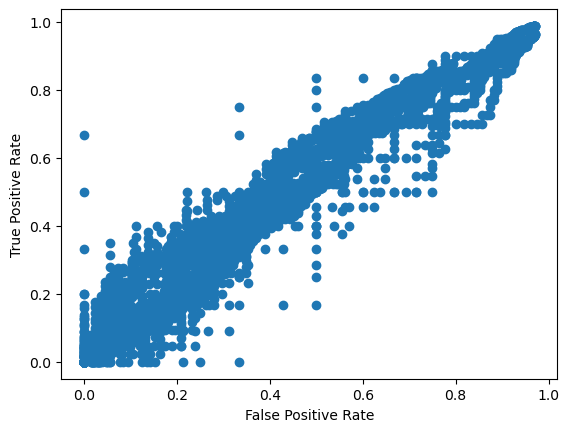

In [57]:
def plot_auc(data):
    _, fprs, tprs = AUC(data)
    plt.scatter(fprs, tprs)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_auc(df)

Por último, obtenemos las gráficas de las correlaciones.

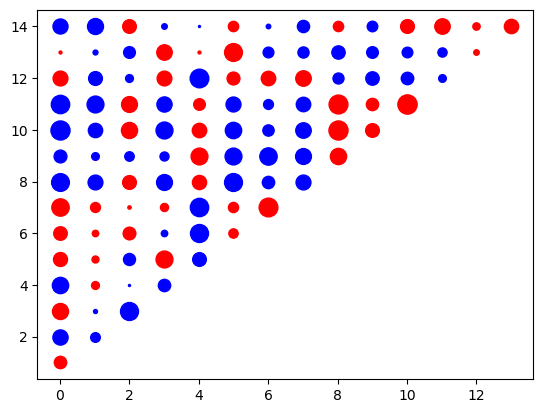

In [58]:
def plot_corr_mutual_info(data):
    correlations = correlation(data)

    # Obtenemos las correlaciones para los pares de columnas numéricas
    numerical_correlations = [(i, j, cor) for i, j, cor in correlations if
                              isinstance(cor, float)]

    # Dibujamos un gráfico de dispersión para cada par de columnas numéricas
    for i, j, cor in numerical_correlations:
        plt.scatter(i, j, s=abs(cor) * 50, c="red" if cor > 0 else "blue")

    plt.show()
plot_corr_mutual_info(dataset)